# Análisis ConnectaTel

Como **analista de datos**, tu objetivo es evaluar el **comportamiento de los clientes** de una empresa de telecomunicaciones en Latinoamérica, ConnectaTel. 

Trabajaremos con información registrada **hasta el año 2024**, lo cual permitirá analizar el comportamiento del negocio dentro de ese periodo.

Para ello trabajarás con tres datasets:  

- **plans.csv** → información de los planes actuales (precio, minutos incluidos, GB incluidos, costo por extra)  
- **users.csv** → información de los clientes (edad, ciudad, fecha de registro, plan, churn)  
- **usage.csv** → detalle del **uso real** de los servicios (llamadas y mensajes)  

Deberás **explorar**, **limpiar** y **analizar** estos datos para construir un **perfil estadístico** de los clientes, detectar **comportamientos atípicos** y crear **segmentos de clientes**.  

Este análisis te permitirá **identificar patrones de consumo**, **diseñar estrategias de retención** y **sugerir mejoras en los planes** ofrecidos por la empresa.

> 💡 Antes de empezar, recuerda pensar de forma **programática**: ¿qué pasos necesitas? ¿En qué orden? ¿Qué quieres medir y por qué?


--- 
## 🧩 Paso 1: Cargar y explorar

Antes de limpiar o combinar los datos, es necesario **familiarizarte con la estructura de los tres datasets**.  
En esta etapa, validarás que los archivos se carguen correctamente, conocerás sus columnas y tipos de datos, y detectarás posibles inconsistencias.

### 1.1 Carga de datos y vista rápida

**🎯 Objetivo:**  
Tener los **3 datasets listos en memoria**, entender su contenido y realizar una revisión preliminar.

**Instrucciones:**  
- Importa las librerías necesarias (por ejemplo `pandas`, `seaborn`, `matplotlib.pyplot`)
- Carga los archivos CSV usando `pd.read_csv()`:
  - **`/datasets/plans.csv`**  
  - **`/datasets/users_latam.csv`**  
  - **`/datasets/usage.csv`**  
- Guarda los DataFrames en las variables: `plans`, `users`, `usage`.  
- Muestra las primeras filas de cada DataFrame usando `.head()`.


In [1]:
# importar librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# cargar archivos
plans = pd.read_csv('/datasets/plans.csv')
users = pd.read_csv('/datasets/users_latam.csv') #completa el código
usage = pd.read_csv('/datasets/usage.csv') #completa el código

In [3]:
# mostrar las primeras 5 filas de plans
plans.head()

,plan_name,messages_included,gb_per_month,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,Basico,100,5,100,12,1.2,0.08,0.10
1,Premium,500,20,600,25,1.0,0.05,0.07


In [4]:
# mostrar las primeras 5 filas de users
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,10000,Carlos,Garcia,38,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN
1,10001,Mateo,Torres,53,?,2022-01-01 06:34:17.914478619,Basico,NaN
2,10002,Sofia,Ramirez,57,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN
3,10003,Mateo,Ramirez,69,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN
4,10004,Mateo,Torres,63,GDL,2022-01-02 02:17:11.657914478,Basico,NaN


In [5]:
# mostrar las primeras 5 filas de usage
usage.head()

,id,user_id,type,date,duration,length
0,1,10332,call,2024-01-01 00:00:00.000000000,0.09,NaN
1,2,11458,text,2024-01-01 00:06:30.969774244,NaN,39.0
2,3,11777,text,2024-01-01 00:13:01.939548488,NaN,36.0
3,4,10682,call,2024-01-01 00:19:32.909322733,1.53,NaN
4,5,12742,call,2024-01-01 00:26:03.879096977,4.84,NaN


**Tip:** Si no usas `print()` la tabla se vera mejor.

### 1.2 Exploración de la estructura de los datasets

**🎯 Objetivo:**  
Conocer la **estructura de cada dataset**, revisar cuántas filas y columnas tienen, identificar los **tipos de datos** de cada columna y detectar posibles **inconsistencias o valores nulos** antes de iniciar el análisis.

**Instrucciones:**  
- Revisa el **número de filas y columnas** de cada dataset usando `.shape`.  
- Usa `.info()` en cada DataFrame para obtener un **resumen completo** de columnas, tipos de datos y valores no nulos.  

In [6]:
# revisar el número de filas y columnas de cada dataset
print("plans", plans.shape)
print("users", users.shape)
print("usage", usage.shape)

plans (2, 8)
users (4000, 8)
usage (40000, 6)


In [7]:
# inspección de plans con .info()
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   plan_name          2 non-null      object 
 1   messages_included  2 non-null      int64  
 2   gb_per_month       2 non-null      int64  
 3   minutes_included   2 non-null      int64  
 4   usd_monthly_pay    2 non-null      int64  
 5   usd_per_gb         2 non-null      float64
 6   usd_per_message    2 non-null      float64
 7   usd_per_minute     2 non-null      float64
dtypes: float64(3), int64(4), object(1)
memory usage: 256.0+ bytes


In [9]:
# inspección de users con .info()
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     4000 non-null   int64 
 1   first_name  4000 non-null   object
 2   last_name   4000 non-null   object
 3   age         4000 non-null   int64 
 4   city        3531 non-null   object
 5   reg_date    4000 non-null   object
 6   plan        4000 non-null   object
 7   churn_date  466 non-null    object
dtypes: int64(2), object(6)
memory usage: 250.1+ KB


In [8]:
# inspección de usage con .info()
usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        40000 non-null  int64  
 1   user_id   40000 non-null  int64  
 2   type      40000 non-null  object 
 3   date      39950 non-null  object 
 4   duration  17924 non-null  float64
 5   length    22104 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.8+ MB


---

## 🧩Paso 2: Identificación de problemas de calidad de datos

### 2.1 Revisión de valores nulos

**🎯 Objetivo:**  
Detectar la presencia y magnitud de valores faltantes para evaluar si afectan el análisis o requieren imputación/eliminación.

**Instrucciones:**  
- Cuenta valores nulos por columna para cada dataset.
- Calcula la proporción de nulos por columna para cada dataset.

El dataset `plans` solamente tiene 2 renglones y se puede observar que no tiene ausentes, por ello no necesita exploración adicional.

<br>
<details>
<summary>Haz clic para ver la pista</summary>
Usa `.isna().sum()` para contar valores nulos y usa `.isna().mean()` para calcular la proporción.

In [9]:
# cantidad de nulos para users
print(users.isna().sum()) # Cantidad de valores nulos)
print(users.isna().mean()) # Proporción de valores nulos)

user_id          0
first_name       0
last_name        0
age              0
city           469
reg_date         0
plan             0
churn_date    3534
dtype: int64
user_id       0.00000
first_name    0.00000
last_name     0.00000
age           0.00000
city          0.11725
reg_date      0.00000
plan          0.00000
churn_date    0.88350
dtype: float64


In [13]:
# cantidad de nulos para usage
print(usage.isna().sum())
print(usage.isna().mean())

id              0
user_id         0
type            0
date           50
duration    22076
length      17896
dtype: int64
id          0.00000
user_id     0.00000
type        0.00000
date        0.00125
duration    0.55190
length      0.44740
dtype: float64


✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico al final del bloque. Incluye qué ves y que acción recomendarías para cada caso.

💡 **Nota:** Justifica tus decisiones brevemente (1 línea por caso).
* Hint:
 - Si una columna tiene **más del 80–90% de nulos**, normalmente se **ignora o elimina**.  
 - Si tiene **entre 5% y 30%**, generalmente se **investiga para imputar o dejar como nulos**.  
 - Si es **menor al 5%**, suele ser un caso simple de imputación o dejar como nulos. 
 
 ---

**Valores nulos**  
- ¿Qué columnas tienen valores faltantes y en qué proporción?

   En el dataset users:

   - La columna city presenta 11.72% de valores faltantes.
   - La columna churn_date tiene 88.35% de valores faltantes.
 
  

   En el dataset usage:


   - La columna date tiene 0.12% de valores faltantes
   - La columna duration tiene 55.19% de valores faltantes
   - La columna length tiene 44.74% de valores faltantes



- Indica qué harías: ¿imputar, eliminar, ignorar?

   En el dataset users:

   - La columna city imputar como "Unknown".
   - La columna churn_date no es un error indica que la mayoria de clientes siguen activos por lo que hay que ignorar.


   En el dataset usage:

   - La columna date tiene tiene tan pocos valores faltantes que eliminaria ya que no podemos inventar fechas.
   - La columna duration son nulos estructurales (mensajes no tienen duración), no es falta de datos es tipo de evento, por lo que ignorar los nulos.
   - La columna length son nulos estructurales (llamadas no tienen longitud de mensaje), al igual que el anterior ignorar.

### 2.2 Detección de valores inválidos y sentinels

🎯 **Objetivo:**  
Identificar sentinels: valores que no deberían estar en el dataset.

**Instrucciones:**
- Explora las columnas numéricas con **un resumen estadístico** y describe brevemente que encontraste.
- Explora las columnas categóricas **relevantes**, revisando sus valores únicos y describe brevemente que encontraste.


El dataset `plans` solamente tiene 2 renglones, por ello no necesita exploración adicional.

In [10]:
# explorar columnas numéricas de users
users[['user_id', 'age']].describe()

,user_id,age
count,4000.000000,4000.000000
mean,11999.500000,33.739750
std,1154.844867,123.232257
min,10000.000000,-999.000000
25%,10999.750000,32.000000
50%,11999.500000,47.000000
75%,12999.250000,63.000000
max,13999.000000,79.000000


- La columna `user_id` los IDs parecen estar en un rango continuo y lógico. No se observan valores inválidos o sentinels.
- La columna `age` el valor -999 es un sentinel, usado comúnmente para representar “dato faltante” o “desconocido”, std = 123 es demasiado alta para edades humanas y la media 33.7 no cuadra con mediana 47 por lo que su distribución es distorsionada por outlier o sentinels.

In [12]:
# explorar columnas numéricas de usage
usage[['id', 'user_id', 'duration', 'length']].describe()

,id,user_id,duration,length
count,40000.00000,40000.000000,17924.000000,22104.000000
mean,20000.50000,12002.405975,5.202237,52.127398
std,11547.14972,1157.279564,6.842701,56.611183
min,1.00000,10000.000000,0.000000,0.000000
25%,10000.75000,10996.000000,1.437500,37.000000
50%,20000.50000,12013.000000,3.500000,50.000000
75%,30000.25000,13005.000000,6.990000,64.000000
max,40000.00000,13999.000000,120.000000,1490.000000


- Las columnas `id` y `user_id` los rangos son coherentes con el dataset de usuarios.
- Las columna `duration` el máximo de 120 minutos (2 horas) es alto pero posible por lo que es un outlier no sentinel, la diferencia entre mediana = 3.5 min vs media = 5.2 min por lo que la distribución está sesgada a la derecha (hay llamadas largas que empujan la media hacia arriba).
- La columna `length` el min es su longitud 0 puede indicar mensajes vacíos o errores de registro, max 1490 caracteres es muy largo para SMS tradicional pero posible no parece un sentinel como -999 sino posibles outliers.

In [13]:
# explorar columnas categóricas de users
columnas_user = ['city', 'plan']
users[columnas_user].describe()

,city,plan
count,3531,4000
unique,7,2
top,Bogotá,Basico
freq,808,2595


- La columna `city` count = 3531 confirma que hay valores nulos, con 7 ciudades distintas siendo Bogotá la que mas usuarios tiene.
- La columna `plan` sin nulos, unique = 2 coincide con los 2 planes de plans.csv, 2595 usuarios están en el plan básico.

In [11]:
# explorar columna categórica de usage
usage['type'].describe() # completa el código

count     40000
unique        2
top        text
freq      22092
Name: type, dtype: object

- La columna `type` sin nulos, con dos tipos de eventos (llamadas y mensajes), freq = 22092 por lo que la mayoria son mensajes de texto.

---
✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico. Incluye qué ves y que acción recomendarías para cada caso. 

**Valores inválidos o sentinels**  
¿En qué columnas encontraste valores inválidos o sentinels?¿Qué acción tomarías?
- `users.age`: Se detectó el valor -999 que corresponde a un sentinel, se recomienda reemplazarlo por NaN para despues volver a calcular estadísticas con datos limpias y despues imputar con la mediana, de esa manera no perdemos informacion valiosa. 
- `usage.duration` y `usage.length`: Presentan altos porcentajes de valores nulos, pero estos corresponden a nulos estructurales según el tipo de evento (call o text). No se consideran valores inválidos ni sentinels, por lo que no requieren imputación, solo análisis segmentado por tipo. Presentan valores extremos que podrían influir en la media, pero al ser comportamientos plausibles del usuario, no se consideran errores. Se recomienda evaluar su impacto en el análisis y, solo si distorsionan métricas agregadas, aplicar técnicas robustas (mediana, percentiles) o winsorización de forma justificada.
- `users.city`: Presenta aproximadamente 11.7% de valores nulos. No se trata de un sentinel, sino de información faltante real. Se recomienda mantener los registros y, en caso de segmentaciones geográficas, imputar la categoría como "Unknown" o analizarla como grupo separado.
- Columnas categóricas `users.plan` y `usage.type`: No presentan valores nulos ni categorías inconsistentes. Las categorías observadas son coherentes con el contexto del negocio, por lo que no se requiere limpieza adicional.

### 2.3 Revisión y estandarización de fechas

**🎯 Objetivo:**  
Asegurar que las columnas de fecha estén correctamente formateadas y detectar años fuera de rango que indiquen errores de captura.

**Instrucciones:**  
- Convierte las columnas de fecha a tipo fecha y asegurate de que el código sea a prueba de errores.  
- Revisa cuántas veces aparece cada año.
- Identifica fechas imposibles (ej. años futuros o negativos).

Toma en cuenta que tenemos datos registrados hasta el año 2024.

In [12]:
# Convertir a fecha la columna `reg_date` de users
users['reg_date'] = pd.to_datetime(users['reg_date'], errors='coerce') # completa el código

In [16]:
# Convertir a fecha la columna `date` de usage
usage['date'] = pd.to_datetime(usage['date'], errors='coerce') # completa el código

In [13]:
# Revisar los años presentes en `reg_date` de users
users['reg_date'].dt.year.value_counts().sort_index()

2022    1314
2023    1316
2024    1330
2026      40
Name: reg_date, dtype: int64

En `reg_date` Se identifican registros en los años 2022, 2023 y 2024, lo cual es consistente con el periodo esperado de operación. Sin embargo, aparecen 40 registros en el año 2026, lo cual representa fechas futuras fuera del rango válido (hasta 2024). Esto indica errores de captura o registro, por lo que esas fechas deben tratarse como inválidas.

In [15]:
# Revisar los años presentes en `date` de usage
usage['date'].dt.year.value_counts().sort_index()

AttributeError: Can only use .dt accessor with datetimelike values

En `date`todos los registros válidos pertenecen al año 2024, lo cual es coherente con el periodo de datos esperado para el uso del servicio. La diferencia entre los 40,000 registros totales y los 39,950 con fecha válida corresponde a los valores nulos previamente detectados.  
Basaremos el análisis en estas fechas.

✍️ **Comentario**: escribe tu diagnóstico, e incluye **qué acción recomendarías** para cada caso:

**Fechas fuera de rango**  
  ¿Aparecen años imposibles? (años muy viejos o sin transcurrir al momento de guardar los datos)¿Qué harías con ellas?
- `users.reg_date`: Aparecen registros con año 2026, que es un año futuro respecto al límite del dataset (2024). Esto indica un error de captura. Se recomienda marcar esas fechas como inválidas y reemplazarlas por NaT para tratarlas como datos faltantes en el análisis temporal.
- `usage.date`: No se encontraron años fuera de rango. Todos los registros válidos pertenecen a 2024, que es coherente con el periodo de análisis. No se requiere corrección, solo mantener los valores nulos ya identificados como faltantes.

---

## 🧩Paso 3: Limpieza básica de datos

### 3.1 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Aplicar reglas de limpieza para reemplazar valores sentinels y corregir fechas imposibles.

**Instrucciones:**  
- En `age`, reemplaza el sentinel **-999** con la mediana.
- En `city`, reemplaza el sentinel `"?"` por valores nulos (`pd.NA`).  
- Marca como nulas (`pd.NA`) las fechas fuera de rango.

In [16]:
# Reemplazar -999 por la mediana de age
age_mediana = users.loc[users['age'] != -999, 'age'].median()
users['age'] = users['age'].replace(-999, age_mediana)

# Verificar cambios
users['age'].describe()

count    4000.000000
mean       48.136000
std        17.689919
min        18.000000
25%        33.000000
50%        48.000000
75%        63.000000
max        79.000000
Name: age, dtype: float64

In [17]:
# Reemplazar ? por NA en city
users['city'] = users['city'].replace('?', pd.NA)
# Verificar cambios
users['city'].value_counts(dropna=False)

Bogotá      808
CDMX        730
Medellín    616
NaN         565
GDL         450
Cali        424
MTY         407
Name: city, dtype: int64

In [18]:
# Marcar fechas futuras como NA para reg_date
users.loc[users['reg_date'].dt.year > 2024, 'reg_date'] = pd.NaT
# Verificar cambios
users['reg_date'].dt.year.value_counts(dropna=False).sort_index()

2022.0    1314
2023.0    1316
2024.0    1330
NaN         40
Name: reg_date, dtype: int64

### 3.2 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Decidir qué hacer con los valores nulos según su proporción y relevancia.

**Instrucciones:**
- Verifica si los nulos en `duration` y `length` son **MAR**(Missing At Random) revisando si dependen de la columna `type`.  
  Si confirmas que son MAR, **déjalos como nulos** y justifica la decisión.

In [19]:
# Verificación MAR en usage (Missing At Random) para duration
# Crear bandera de nulos
usage['duration_missing'] = usage['duration'].isna()
# Proporción de nulos por tipo de evento
usage.groupby('type')['duration_missing'].mean()

type
call    0.000000
text    0.999276
Name: duration_missing, dtype: float64

In [21]:
# Verificación MAR en usage (Missing At Random) para length
# Crear bandera de nulos
usage['length_missing'] = usage['length'].isna()
# Proporción de nulos por tipo de evento
usage.groupby('type')['length_missing'].mean()

type
call    0.99933
text    0.00000
Name: length_missing, dtype: float64

Los valores nulos en duration y length siguen un patrón casi perfecto dependiendo de type, por lo que no son aleatorios. Corresponden a faltantes estructurales, ya que:

- `duration` solo es válida para registros de tipo call
- `length` solo es válida para registros de tipo text

Las pequeñas desviaciones (~0.07%) pueden deberse a errores de registro, pero no cambian el patrón general.

---

## 🧩Paso 4: Summary statistics de uso por usuario


### 4.1 Agrupación por comportamiento de uso

🎯**Objetivo**: Resumir las variables clave de la tabla `usage` **por usuario**, creando métricas que representen su comportamiento real de uso histórico. 

**Instrucciones:**: 
1. Construye una tabla agregada de `usage` por `user_id` que incluya:
- número total de mensajes  
- número total de llamadas  
- total de minutos de llamadas

2. Renombra las columnas para que tengan nombres claros:  
- `cant_mensajes`  
- `cant_llamadas`  
- `cant_minutos_llamada`
3. Combina esta tabla con `users`.

In [22]:
# Columnas auxiliares
usage["is_text"] = (usage["type"] == "text").astype(int) #conocer el total de mensajes
usage["is_call"] = (usage["type"] == "call").astype(int) #conocer el total de llamadas

# Agrupar información por usuario
usage_agg = (
    usage.groupby("user_id")
         .agg({
             "is_text": "sum",        # total mensajes
             "is_call": "sum",        # total llamadas
             "duration": "sum"        # total minutos hablados
         })
         .reset_index()
) 

# observar resultado
usage_agg.head(3)

,user_id,is_text,is_call,duration
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [23]:
# Renombrar columnas
usage_agg = usage_agg.rename(columns={
    "is_text": "cant_mensajes",
    "is_call": "cant_llamadas",
    "duration": "cant_minutos_llamada"
})
# observar resultado
usage_agg.head(3)

,user_id,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [24]:
# Combinar la tabla agregada con el dataset de usuarios
user_profile = users.merge(usage_agg, on="user_id", how="left")
user_profile.head(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7.0,3.0,23.70
1,10001,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,33.18
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,10.74
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,8.99
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,8.01


### 4.2 4.2 Resumen estadístico por usuario durante el 2024

🎯 **Objetivo:** Analizar las columnas numéricas y categóricas de los usuarios, para identificar rangos, valores extremos y distribución de los datos antes de continuar con el análisis.

**Instrucciones:**  
1. Para las columnas **numéricas** relevantes, obtén un resumen estadístico (media, mediana, mínimo, máximo, etc.).  
2. Para la columna **categórica** `plan`, revisa la distribución en **porcentajes** de cada categoría.

In [25]:
# Resumen estadístico de las columnas numéricas
cols_numericas = [
    "age",
    "cant_mensajes",
    "cant_llamadas",
    "cant_minutos_llamada"
]

user_profile[cols_numericas].describe()

,age,cant_mensajes,cant_llamadas,cant_minutos_llamada
count,4000.000000,3999.000000,3999.000000,3999.000000
mean,48.136000,5.524381,4.478120,23.317054
std,17.689919,2.358416,2.144238,18.168095
min,18.000000,0.000000,0.000000,0.000000
25%,33.000000,4.000000,3.000000,11.120000
50%,48.000000,5.000000,4.000000,19.780000
75%,63.000000,7.000000,6.000000,31.415000
max,79.000000,17.000000,15.000000,155.690000


In [26]:
# Distribución porcentual del tipo de plan
user_profile["plan"].value_counts(normalize=True) * 100

Basico     64.875
Premium    35.125
Name: plan, dtype: float64

---

## 🧩Paso 5: Visualización de distribuciones (uso y clientes) y outliers


### 5.1 Visualización de Distribuciones

🎯 **Objetivo:**  
Entender visualmente cómo se comportan las variables clave tanto de **uso** como de **clientes**, observar si existen diferencias según el tipo de plan, y analizar la **forma de la distribución**.

**Instrucciones:**  
Graficar **histogramas** para las siguientes columnas:  
- `age` (edad de los usuarios)
- `cant_mensajes`
- `cant_llamadas`
- `total_minutos_llamada` 

Después de cada gráfico, escribe un **insight** respecto al plan y la variable, por ejemplo:  
- "Dentro del plan Premium, hay mayor proporción de..."  
- "Los usuarios Básico tienden a hacer ... llamadas y enviar ... mensajes."  o "No existe algún patrón."
- ¿Qué tipo de distribución tiene ? (simétrica, sesgada a la derecha o a la izquierda) 

**Hint**  
Para cada histograma, 
- Usa `hue='plan'` para ver cómo varían las distribuciones según el plan (Básico o Premium).
- Usa `palette=['skyblue','green']`
- Agrega título y etiquetas

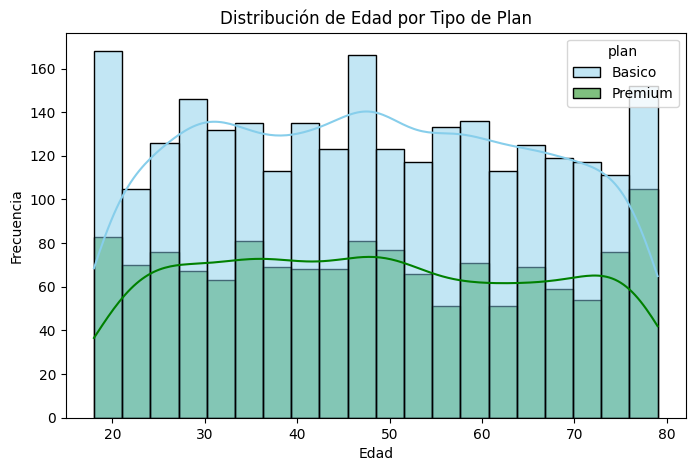

In [27]:
# Histograma para visualizar la edad (age)
plt.figure(figsize=(8,5))
sns.histplot(data=user_profile, x="age", hue="plan", kde=True,
             palette=["skyblue","green"], bins=20)

plt.title("Distribución de Edad por Tipo de Plan")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

💡Insights: 
- Se observa que hay más usuarios en el plan Básico que en el plan Premium, lo cual coincide con la distribución general de planes vista anteriormente.
- En el plan basico podemos obserbar que hay 3 picos relativamente importantes que se encuentran en 3 perfiles distintos aproximadamente jovenes de 20 años, adultos de 48 años y adultos mayores de 78 años. (Podria analizarse más a fondo estos clusters naturales)
- En el plan premium podemos observar que hay un ligero pico al final para la edad aproximada de 78 años.
- Las curvas KDE para ambos planes muestran una forma suave y amplia, sin picos extremadamente marcados. Esto indica que la edad está bastante distribuida a lo largo de todo el rango, no concentrada solo en jóvenes o adultos mayores, no se observa una separación clara entre planes; las curvas de Básico y Premium se superponen mucho, lo que sugiere que la edad no es un factor determinante para elegir un plan.

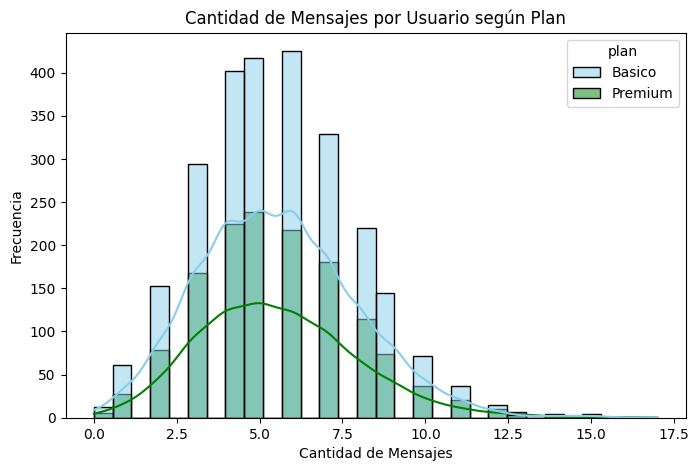

In [28]:
# Histograma para visualizar la cant_mensajes
plt.figure(figsize=(8,5))
sns.histplot(data=user_profile, x="cant_mensajes", hue="plan", kde=True,
             palette=["skyblue","green"], bins=30)

plt.title("Cantidad de Mensajes por Usuario según Plan")
plt.xlabel("Cantidad de Mensajes")
plt.ylabel("Frecuencia")
plt.show()

💡Insights: 

- Podemos observar que al haber más usuarios del plan basico la cantidad de mensajes por usuario es mayor en consecuencia. 
- Ambos planes presentan una distribución ligeramente sesgada a la derecha por lo que la mayoría de los usuarios envía pocos mensajes (entre 2 y 8), mientras que solo unos pocos envían cantidades muy altas.
- Las curvas de densidad (KDE) presentan una forma de montaña con un pico bien definido, lo que indica que existe un comportamiento típico de envío de mensajes, concentrado alrededor de un rango específico.
- Esto sugiere que el patrón de mensajería es consistente y similar entre ambos planes, sin diferencias marcadas en el uso habitual.

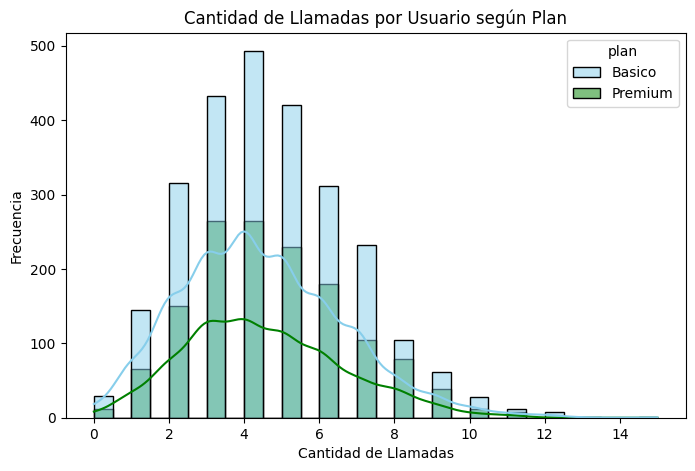

In [31]:
# Histograma para visualizar la cant_llamadas
plt.figure(figsize=(8,5))
sns.histplot(data=user_profile, x="cant_llamadas", hue="plan", kde=True,
             palette=["skyblue","green"], bins=30)

plt.title("Cantidad de Llamadas por Usuario según Plan")
plt.xlabel("Cantidad de Llamadas")
plt.ylabel("Frecuencia")
plt.show()

💡Insights:
- Se observa que la mayor parte de los usuarios, tanto del plan Básico como del Premium, realiza un número relativamente bajo de llamadas. La mayor concentración de usuarios se encuentra aproximadamente entre 2 y 6 llamadas
- La distribución presenta un sesgo claro a la derecha, lo que indica que la mayoría de los usuarios hace pocas llamadas mientras que un grupo pequeño realiza muchas llamadas (usuarios intensivos).
- Las curvas de densidad (KDE) muestran una forma de montaña con un pico bien definido, lo que indica que existe un comportamiento típico de uso, concentrado en un rango específico de llamadas.
- Las curvas de ambos planes se superponen considerablemente, lo que sugiere que el patrón de llamadas es bastante similar entre usuarios Básico y Premium.

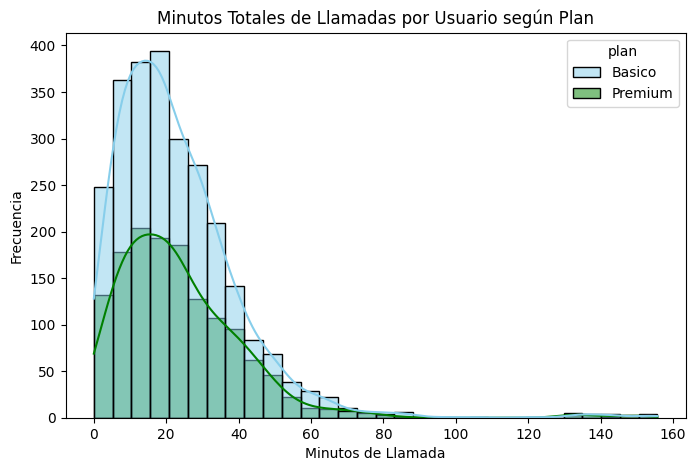

In [30]:
# Histograma para visualizar la cant_minutos_llamada
plt.figure(figsize=(8,5))
sns.histplot(data=user_profile, x="cant_minutos_llamada", hue="plan", kde=True,
             palette=["skyblue","green"], bins=30)

plt.title("Minutos Totales de Llamadas por Usuario según Plan")
plt.xlabel("Minutos de Llamada")
plt.ylabel("Frecuencia")
plt.show()

💡Insights: 
- La mayoría de los usuarios de ambos planes se concentra en rangos bajos de consumo de minutos, principalmente por debajo de los 40 minutos en el periodo analizado.
- La distribución es claramente sesgada a la derecha, lo que indica que la mayoría de los usuarios habla poco y existe un grupo reducido de usuarios con consumos muy altos de minutos.
- Las curvas de densidad (KDE) muestran una forma de montaña al inicio con una cola larga hacia la derecha, lo cual es característico de este tipo de consumos: muchos usuarios ligeros y pocos muy intensivos.
- A diferencia de la cantidad de llamadas, aquí sí se alcanza a notar que el plan Premium tiene una presencia ligeramente mayor en los rangos más altos de minutos, lo que sugiere que los usuarios que más tiempo hablan tienden un poco más a estar en este plan.

### 5.2 Identificación de Outliers

🎯 **Objetivo:**  
Detectar valores extremos en las variables clave de **uso** y **clientes** que podrían afectar el análisis, y decidir si requieren limpieza o revisión adicional.

**Instrucciones:**  
- Usa **boxplots** para identificar visualmente outliers en las siguientes columnas:  
  - `age` 
  - `cant_mensajes`
  - `cant_llamadas`
  - `total_minutos_llamada`  
- Crea un **for** para generar los 4 boxplots automáticamente.
<br>

- Después de crear los gráfico, responde si **existen o no outliers** en las variables.  
- Si hay outliers, crea otro bucle para calcular los límites de esas columnas usando el **método IQR** y decide qué hacer con ellos.
  - Si solamente hay outliers de un solo lado, no es necesario calcular ambos límites.

**Hint:**
- Dentro del bucle, usa `plt.title(f'Boxplot: {col}')` para que el título cambie acorde a la columna.

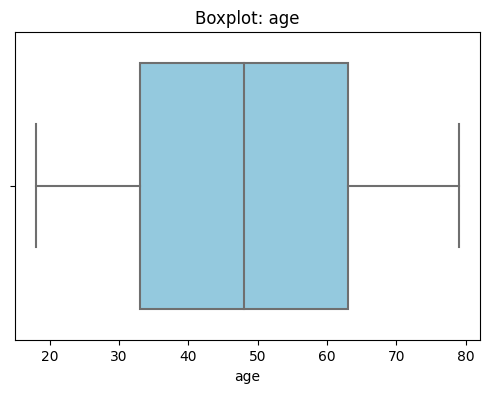

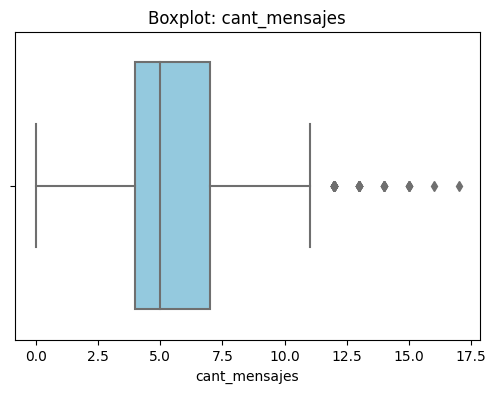

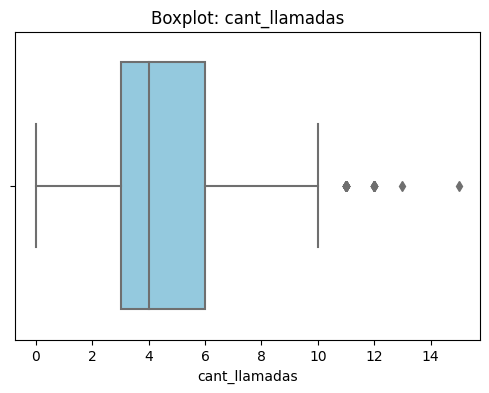

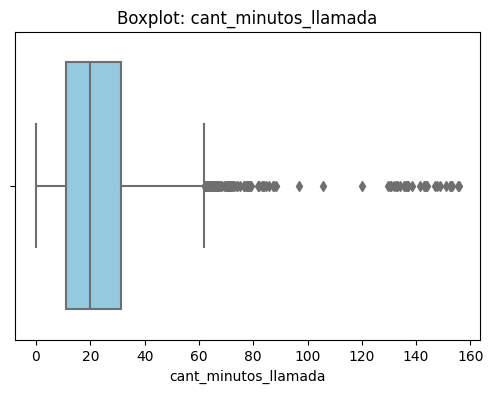

In [32]:
# Visualizando usando BoxPlot 
columnas_numericas = ['age', 'cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']

for col in columnas_numericas:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=user_profile[col], color="skyblue")
    plt.title(f'Boxplot: {col}')
    plt.show()

💡Insights: 
- Age: No se observan outliers, todas las edades se encuentran dentro de un rango lógico.
- cant_mensajes: Sí se observan outliers en el extremo derecho, existen usuarios que envían una cantidad de mensajes considerablemente mayor que la mayoría.
- cant_llamadas: Se detectan outliers hacia la derecha, algunos usuarios realizan muchas más llamadas que el resto.
- cant_minutos_llamada: Esta variable presenta la mayor cantidad de outliers y con mayor distancia respecto al resto de los datos. Hay usuarios con consumos de minutos extremadamente altos generando una cola larga a la derecha.

In [33]:
# Calcular límites con el método IQR
columnas_limites = ['cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']

for col in columnas_limites:
    Q1 = user_profile[col].quantile(0.25)
    Q3 = user_profile[col].quantile(0.75)
    IQR = Q3 - Q1
    
    limite_superior = Q3 + 1.5 * IQR
    
    print(f"{col}")
    print(f"Q1: {Q1}")
    print(f"Q3: {Q3}")
    print(f"IQR: {IQR}")
    print(f"Límite superior: {limite_superior}\n")

cant_mensajes
Q1: 4.0
Q3: 7.0
IQR: 3.0
Límite superior: 11.5

cant_llamadas
Q1: 3.0
Q3: 6.0
IQR: 3.0
Límite superior: 10.5

cant_minutos_llamada
Q1: 11.12
Q3: 31.415
IQR: 20.295
Límite superior: 61.8575



In [34]:
# Revisa los limites superiores y el max, para tomar la decisión de mantener los outliers o no
user_profile[columnas_limites].describe()

,cant_mensajes,cant_llamadas,cant_minutos_llamada
count,3999.000000,3999.000000,3999.000000
mean,5.524381,4.478120,23.317054
std,2.358416,2.144238,18.168095
min,0.000000,0.000000,0.000000
25%,4.000000,3.000000,11.120000
50%,5.000000,4.000000,19.780000
75%,7.000000,6.000000,31.415000
max,17.000000,15.000000,155.690000


💡Insights: 
- cant_mensajes: Sí existen outliers (usuarios que envían más de 11–12 mensajes), pero la diferencia no es extrema y sigue siendo un comportamiento posible dentro del uso normal de mensajería por lo que hay que mantener los outliers ya que representan usuarios más activos, no errores de registro. Son útiles para identificar segmentos de alto uso.
- cant_llamadas: También hay valores por encima del límite, pero nuevamente son cantidades plausibles. No hay evidencia de errores por lo que hay que mantener los outliers porque reflejan clientes que usan más intensamente el servicio de llamadas.
- cant_minutos_llamada: Aquí sí hay una diferencia grande entre el límite y el máximo, lo que indica una cola larga de usuarios con consumo muy alto. Aun así, estos valores son coherentes con el comportamiento real de telecom usuarios que hablan mucho, por lo que hay que mantener los outliers para análisis de negocio, ya que identifican clientes de alto consumo. Sin embargo se debe aplicar winsorización o transformación logarítmica para reducir su impacto.

---

## 🧩Paso 6: Segmentación de Clientes

### 6.1 Segmentación de Clientes Por Uso

🎯 **Objetivo:** Clasificar a cada usuario en un grupo de uso (Bajo uso, Uso medio, Alto uso) basándose en la cantidad de llamadas y mensajes registrados.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_uso` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones de llamadas y mensajes y asigna:
  - `'Bajo uso'` cuando llamadas < 5 y mensajes < 5
  - `'Uso medio'` cuando llamadas < 10 y mensajes < 10
  - `'Alto uso'` para el resto de casos

In [35]:
# Crear columna grupo_uso
user_profile['grupo_uso'] = 'Alto uso'  # valor por defecto

user_profile.loc[
    (user_profile['cant_llamadas'] < 5) & (user_profile['cant_mensajes'] < 5),
    'grupo_uso'
] = 'Bajo uso'

user_profile.loc[
    (user_profile['cant_llamadas'] < 10) & (user_profile['cant_mensajes'] < 10) &
    ~((user_profile['cant_llamadas'] < 5) & (user_profile['cant_mensajes'] < 5)),
    'grupo_uso'
] = 'Uso medio'

In [36]:
# verificar cambios
user_profile.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada,grupo_uso
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7.0,3.0,23.70,Uso medio
1,10001,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,33.18,Alto uso
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,10.74,Uso medio
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,8.99,Alto uso
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,8.01,Bajo uso


### 6.2 Segmentación de Clientes Por Edad

🎯 **Objetivo:**: Clasificar a cada usuario en un grupo por **edad**.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_edad` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones y asigna:
  - `'Joven'` cuando age < 30
  - `'Adulto'` cuando age < 60
  - `'Adulto Mayor'` para el resto de casos

In [37]:
# Crear columna grupo_edad
user_profile['grupo_edad'] = 'Adulto Mayor'  # valor por defecto

user_profile.loc[user_profile['age'] < 30, 'grupo_edad'] = 'Joven'

user_profile.loc[
    (user_profile['age'] < 60) & (user_profile['age'] >= 30),
    'grupo_edad'
] = 'Adulto'

In [38]:
# verificar cambios
user_profile.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada,grupo_uso,grupo_edad
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7.0,3.0,23.70,Uso medio,Adulto
1,10001,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,33.18,Alto uso,Adulto
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,10.74,Uso medio,Adulto
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,8.99,Alto uso,Adulto Mayor
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,8.01,Bajo uso,Adulto Mayor


### 6.3 Visualización de la Segmentación de Clientes

🎯 **Objetivo:** Visualizar la distribución de los usuarios según los grupos creados: **grupo_uso** y **grupo_edad**.

**Instrucciones:**  
- Crea dos gráficos para las variables categóricas `grupo_uso` y `grupo_edad`.
- Agrega título y etiquetas a los ejes en cada gráfico.

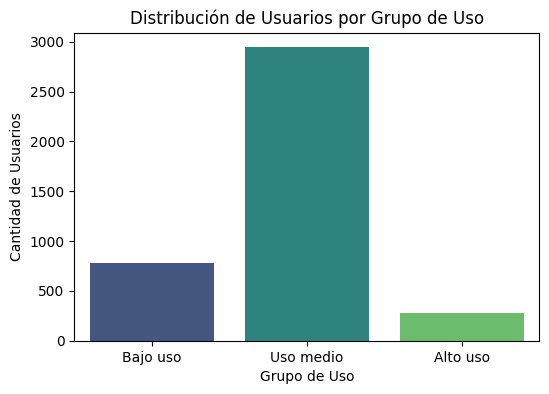

In [39]:
# Visualización de los segmentos por uso
plt.figure(figsize=(6,4))
sns.countplot(data=user_profile, x='grupo_uso', order=['Bajo uso','Uso medio','Alto uso'],
              palette='viridis')

plt.title('Distribución de Usuarios por Grupo de Uso')
plt.xlabel('Grupo de Uso')
plt.ylabel('Cantidad de Usuarios')
plt.show()

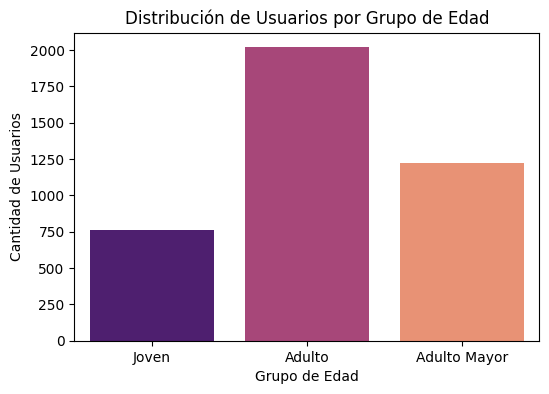

In [40]:
# Visualización de los segmentos por edad
plt.figure(figsize=(6,4))
sns.countplot(data=user_profile, x='grupo_edad',
              order=['Joven','Adulto','Adulto Mayor'],
              palette='magma')

plt.title('Distribución de Usuarios por Grupo de Edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('Cantidad de Usuarios')
plt.show()


---
## 🧩Paso 7: Insight Ejecutivo para Stakeholders

🎯 **Objetivo:** Traducir los hallazgos del análisis en conclusiones accionables para el negocio, enfocadas en segmentación, patrones de uso y oportunidades comerciales.

**Preguntas a responder:** 
- ¿Qué problemas tenían originalmemte los datos?¿Qué porcentaje, o cantidad de filas, de esa columna representaban?


- ¿Qué segmentos de clientes identificaste y cómo se comportan según su edad y nivel de uso?  
- ¿Qué segmentos parecen más valiosos para ConnectaTel y por qué?  
- ¿Qué patrones de uso extremo (outliers) encontraste y qué implican para el negocio?


- ¿Qué recomendaciones harías para mejorar la oferta actual de planes o crear nuevos planes basados en los segmentos y patrones detectados?

✍️ **Escribe aquí tu análisis ejecutivo:**

### Análisis ejecutivo

⚠️ **Problemas detectados en los datos**
- Edades con valor sentinel (-999) que representaban edades imposibles. Estos valores fueron reemplazados por la mediana de edad, ya que la edad es una variable numérica continua y la mediana no se ve afectada por extremos.
- Ciudades con valor desconocido ("?"), que fueron convertidas a valores nulos (NaN). Esto permite tratarlos correctamente en análisis posteriores sin distorsionar las categorías reales.
- Fechas de registro imposibles (posteriores a 2024), que fueron marcadas como valores faltantes (NaT). Esto evita interpretar registros futuros que no tienen sentido para el análisis histórico.


🔍 **Segmentos por Edad**
- Se clasificó a los usuarios en tres grupos:
    - Jóvenes (<30 años), Grupo más pequeño
    - Adultos (30–59 años), Grupo más grande de la base
    - Adultos Mayores (60+ años), Segundo grupo más relevante
- La base de clientes está dominada por adultos, lo que indica que ConnectaTel tiene una clientela principalmente madura, no juvenil. Esto influye directamente en los hábitos de uso y en el tipo de planes que pueden resultar más atractivos. 


📊 **Segmentos por Nivel de Uso**
- Se crearon tres segmentos de comportamiento:
      - Bajo uso: Pocas llamadas y pocos mensajes.
      - Uso medio: Uso moderado y estable.
      - Alto uso: Alta actividad en llamadas y/o mensajes.
- La mayoría de los clientes pertenece al grupo de Uso medio, lo que indica que el usuario típico de ConnectaTel utiliza el servicio de forma regular pero no intensiva.
- El grupo de Alto uso es más pequeño, pero representa a los usuarios que más consumen recursos de red y mayor potencial de ingresos.

➡️ Esto sugiere que la empresa tiene una base estable de usuarios moderados, pero existen nichos de alto valor que podrían ser mejor explotados comercialmente.


💡 **Recomendaciones**
1. Crear planes diferenciados por nivel de uso
    - Un plan económico enfocado en usuarios de bajo uso.
    - Mantener un plan estándar optimizado para el gran grupo de uso medio.
    - Diseñar un plan premium o ilimitado dirigido a los usuarios de alto uso.
      
2. Estrategias enfocadas en adultos
    - Menos enfoque en promociones juveniles y más en valor y confiabilidad. Dado que la mayoría son adultos.
  
3. Monetizar mejor a los usuarios intensivos
Los outliers muestran que existen clientes con consumo muy alto:
    - Ofrecerles upgrades automáticos a planes superiores
    - Planes con más minutos incluidos o beneficios exclusivos para fidelizarlos.
      
4. Usar la segmentación para marketing dirigido:
Ahora ConnectaTel puede:
    - Enviar promociones específicas según grupo de uso
    - Diseñar campañas diferentes para jóvenes vs adultos mayores
    - Personalizar ofertas según comportamiento real, no suposiciones
      
5. Implementar una Matriz ABC–XYZ de Clientes
ConnectaTel puede complementar la segmentación actual (por edad y nivel de uso) con una matriz ABC–XYZ, que permite clasificar clientes según:
    - Dimensión ABC (Valor del cliente)
      Basado en cuánto consume el usuario (minutos, llamadas, mensajes, ingresos):

        * A → Clientes de alto valor (mucho uso / mayor ingreso)
        * B → Clientes de valor medio
        * C → Clientes de bajo valor

Aquí entrarían muchos de los usuarios de alto uso que detectaste como outliers reales.

    - Dimensión XYZ (Estabilidad del comportamiento)
      Basado en qué tan constante es su consumo mes a mes:

        * X → Consumo estable y predecible
        * Y → Consumo con variaciones moderadas
        * Z → Consumo muy variable o impredecible

Esto es clave para telecom, porque no todos los usuarios intensivos son constantes.
| Segmento | Características | Estrategia Comercial |
|----------|----------------|---------------------|
| **AX** (alto valor + estable) | Clientes VIP → fidelización, beneficios exclusivos | Programas de lealtad, atención premium |
| **AZ** (alto valor + variable) | Detectar picos → ofrecer planes flexibles o paquetes adicionales | Planes adaptativos, ofertas por uso |
| **BX** (valor medio + estable) | Base principal → mantener satisfechos, upselling ligero | Promociones graduales, mejoras de plan |
| **CX** (bajo valor + estable) | Planes económicos, automatizar atención | Planes básicos optimizados, autoservicio |
| **CZ** (bajo valor + inestable) | Bajo enfoque comercial, control de costos | Monitoreo automático, planes prepago |

---

## 🧩Paso 8 Cargar tu notebook y README a GitHub

🎯 **Objetivo:**  
Entregar tu análisis de forma **profesional**, **documentada** y **versionada**, asegurando que cualquier persona pueda revisar, ejecutar y entender tu trabajo.



### Opción A : Subir archivos desde la interfaz de GitHub (UI)

1. Descarga este notebook (`File → Download .ipynb`).  
2. Entra a tu repositorio en GitHub (por ejemplo `telecom-analysis` o `sprint7-final-project`).  
3. Sube tu notebook **Add file → Upload files**.  

---

### Opción B : Guardar directo desde Google Colab

1. Abre tu notebook en Colab.  
2. Ve a **File → Save a copy in GitHub**.  
3. Selecciona el repositorio y la carpeta correcta (ej: `notebooks/`).  
4. Escribe un mensaje de commit claro, por ejemplo:  
    - `feat: add final ConnectaTel analysis`
    - `agregar version final: Análisis ConnectaTel`
5. Verifica en GitHub que el archivo quedó en el lugar correcto y que el historial de commits se mantenga limpio.

---

Agrega un archivo `README.md` que describa de forma clara:
- el objetivo del proyecto,  
- los datasets utilizados,  
- las etapas del análisis realizadas,  
- cómo ejecutar el notebook (por ejemplo, abrirlo en Google Colab),  
- una breve guía de reproducción.
---

Link a repositorio público del proyecto: `LINK a tu repo aquí`